<a href="https://colab.research.google.com/github/nkongenelly/ArtificialIntelligence/blob/master/My_Code_For_ASTIS_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nellynkonge","key":"b2dcb08e200849dd89187146cd21dc00"}'}

In [14]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Feb 14 19:13 kaggle.json


In [15]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [16]:
!pip install kaggle --upgrade

In [17]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
# List available datasets.
!kaggle datasets list -s fruits

ref                                                            title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
moltean/fruits                                                 Fruits 360                                           1GB  2021-09-12 19:19:48          86525  
aelchimminut/fruits262                                         Fruits-262                                           6GB  2021-12-15 19:16:59           1379  
kritikseth/fruit-and-vegetable-image-recognition               Fruits and Vegetables Image Recognition Dataset      2GB  2022-02-12 06:15:55           4346  
mjamilmoughal/fruits-with-colors-dataset                       Fruits with colors dataset                          816B  2018-01-13 10:22:33          13918  
sshikamaru/fruit-recognition                        

In [19]:
# Copy the moltean/fruits data set locally.
!kaggle datasets download -d moltean/fruits

100% 1.28G/1.28G [00:17<00:00, 83.6MB/s]
100% 1.28G/1.28G [00:17<00:00, 78.4MB/s]


In [20]:
# Check if dataset has been downloaded
import glob
print(glob.glob("/content/*"))

['/content/kaggle.json', '/content/fruits.zip', '/content/sample_data']


In [21]:
# Unzip dataset folder
import zipfile
with zipfile.ZipFile("/content/fruits.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/fruits")

In [58]:
# Check if dataset has been downloaded
import glob
print(glob.glob("/content/fruits/fruits-360_dataset/fruits-360/Training/*"))

['/content/fruits/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red', '/content/fruits/fruits-360_dataset/fruits-360/Training/Nectarine Flat', '/content/fruits/fruits-360_dataset/fruits-360/Training/Cactus fruit', '/content/fruits/fruits-360_dataset/fruits-360/Training/Banana', '/content/fruits/fruits-360_dataset/fruits-360/Training/Pear', '/content/fruits/fruits-360_dataset/fruits-360/Training/Cucumber Ripe', '/content/fruits/fruits-360_dataset/fruits-360/Training/Plum 3', '/content/fruits/fruits-360_dataset/fruits-360/Training/Potato Red Washed', '/content/fruits/fruits-360_dataset/fruits-360/Training/Tomato 4', '/content/fruits/fruits-360_dataset/fruits-360/Training/Cherry Wax Black', '/content/fruits/fruits-360_dataset/fruits-360/Training/Mango', '/content/fruits/fruits-360_dataset/fruits-360/Training/Apple Red 3', '/content/fruits/fruits-360_dataset/fruits-360/Training/Onion Red', '/content/fruits/fruits-360_dataset/fruits-360/Training/Grape White 2', '/content/fruits/fruit

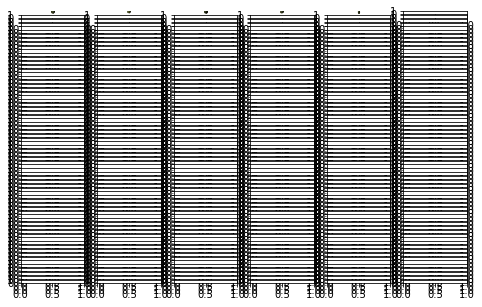

In [23]:
# Imports
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

# Configuration
dir_with_examples = '/content/fruits/fruits-360_dataset/fruits-360/Training/Avocado'
files_per_row = 6

# List the directory and perform computations
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(8, 5, forward=True)

# Map each file to subplot
for i in range(0, 5): #len(files_in_dir) - 1
  file_name = files_in_dir[i]
  image = Image.open(f'{dir_with_examples}/{file_name}')
  row = math.floor(i / files_per_row)
  col = i % files_per_row
  axs[row, col].imshow(image)
  axs[row, col].axis('off')

# Show the plot
# plt.show()

In [24]:
#From the original Training and Test folders, we copy the fruits we wish to classify for
import os
  
# Directory
directory = "Training_smaller"
directoryTest = "Test_smaller"
  
# Parent Directory path
parent_dir = "/content/fruits/fruits-360_dataset/fruits-360/"
  
# Path
path = os.path.join(parent_dir, directory)
pathTest = os.path.join(parent_dir, directoryTest)
  
# Create the directoryin
# '/home / User / Documents'
if not os.path.exists(path):
  os.mkdir(path)
  print("Directory '% s' created" % directory)
elif not os.path.exists(pathTest):
  os.mkdir(pathTest)
  print("Directory '% s' created" % directoryTest)



import glob
print(glob.glob("/content/fruits/fruits-360_dataset/fruits-360/*"))

Directory 'Training_smaller' created
['/content/fruits/fruits-360_dataset/fruits-360/test-multiple_fruits', '/content/fruits/fruits-360_dataset/fruits-360/LICENSE', '/content/fruits/fruits-360_dataset/fruits-360/Training', '/content/fruits/fruits-360_dataset/fruits-360/readme.md', '/content/fruits/fruits-360_dataset/fruits-360/Training_smaller', '/content/fruits/fruits-360_dataset/fruits-360/papers', '/content/fruits/fruits-360_dataset/fruits-360/Test']


In [100]:
# Copy files to the new *_smaller folders
import os
import shutil
# import glob
# print(glob.glob("/content/fruits/fruits-360_dataset/fruits-360/Training/*"))
src_files = ['Avocado', 'Onion White', 'Tomato 4', 'Corn', 'Potato Red Washed', 'Eggplant', 'Apple Red 3', 'Orange', 'Ginger Root', 'Onion Red']
src = "/content/fruits/fruits-360_dataset/fruits-360/Training/"
srcTest = "/content/fruits/fruits-360_dataset/fruits-360/Test/"
dest = "/content/fruits/fruits-360_dataset/fruits-360/Training_smaller/"
destTest = "/content/fruits/fruits-360_dataset/fruits-360/Test_smaller/"
for file_name in src_files:
    full_file_name = os.path.join(src, file_name)
    full_file_name_test = os.path.join(srcTest, file_name)
    full_file_name_dest = os.path.join(dest, file_name)
    full_file_name_destTest = os.path.join(destTest, file_name)
    if os.path.isdir(full_file_name) \
            and not os.path.exists(full_file_name_dest) :
        shutil.copytree(full_file_name, full_file_name_dest)
    elif os.path.isdir(full_file_name) \
            and not os.path.exists(full_file_name_destTest):
        shutil.copytree(full_file_name, full_file_name_destTest)

print(glob.glob("/content/fruits/fruits-360_dataset/fruits-360/Test_smaller/*"))

['/content/fruits/fruits-360_dataset/fruits-360/Test_smaller/Potato Red Washed', '/content/fruits/fruits-360_dataset/fruits-360/Test_smaller/Tomato 4', '/content/fruits/fruits-360_dataset/fruits-360/Test_smaller/Apple Red 3', '/content/fruits/fruits-360_dataset/fruits-360/Test_smaller/Onion Red', '/content/fruits/fruits-360_dataset/fruits-360/Test_smaller/Avocado', '/content/fruits/fruits-360_dataset/fruits-360/Test_smaller/Ginger Root', '/content/fruits/fruits-360_dataset/fruits-360/Test_smaller/Eggplant', '/content/fruits/fruits-360_dataset/fruits-360/Test_smaller/Orange', '/content/fruits/fruits-360_dataset/fruits-360/Test_smaller/Corn', '/content/fruits/fruits-360_dataset/fruits-360/Test_smaller/Onion White']


In [115]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data configuration
training_set_folder = '/content/fruits/fruits-360_dataset/fruits-360/Training_smaller'
test_set_folder     = '/content/fruits/fruits-360_dataset/fruits-360/Test_smaller'

# Model configuration
batch_size = 25
img_width, img_height, img_num_channels = 25, 25, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 25
optimizer = Adam()
verbosity = 1

print(os.getcwd())

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Create a generator
train_datagen = ImageDataGenerator(
  rescale=1./255
)

path = "/content/fruits/fruits-360_dataset/fruits-360/adapted-images"

if not os.path.exists(path):
  os.mkdir(path)
train_datagen = train_datagen.flow_from_directory(
        training_set_folder,
        save_to_dir=path,
        save_format='jpeg',
        batch_size=batch_size,
        target_size=(25, 25),
        class_mode='sparse')

# Create the model
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Display a model summary
model.summary()

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Start training
model.fit(
        train_datagen,
        epochs=no_epochs,
        shuffle=False)

/content/fruits/fruits-360_dataset/fruits-360
Found 4370 images belonging to 10 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 21, 21, 16)        1216      
                                                                 
 conv2d_5 (Conv2D)           (None, 17, 17, 32)        12832     
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        51264     
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 128)         204928    
                                                                 
 flatten_1 (Flatten)         (None, 10368)             0         
                                                                 
 dense_2 (Dense)             (None, 16)                165904    
                               

In [114]:
import glob
path = "/content/fruits/fruits-360_dataset/fruits-360/adapted-images"

glob.glob("/content/fruits/fruits-360_dataset/fruits-360/*")

False


['/content/fruits/fruits-360_dataset/fruits-360/Test_smaller',
 '/content/fruits/fruits-360_dataset/fruits-360/test-multiple_fruits',
 '/content/fruits/fruits-360_dataset/fruits-360/LICENSE',
 '/content/fruits/fruits-360_dataset/fruits-360/Training',
 '/content/fruits/fruits-360_dataset/fruits-360/readme.md',
 '/content/fruits/fruits-360_dataset/fruits-360/Training_smaller',
 '/content/fruits/fruits-360_dataset/fruits-360/papers',
 '/content/fruits/fruits-360_dataset/fruits-360/Test']